### k-means clustering

1. Randomly pick k centroids from the examples as initial cluster centers
2. Assign each example to the nearest centroid, 𝜇(j)
,𝑗 belong to {1, … , 𝑘}
3. Move the centroids to the center of the examples that were assigned to it
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance
or maximum number of iterations is reachedached

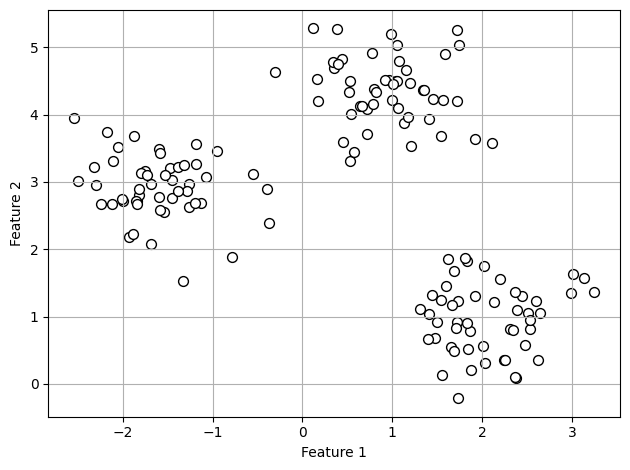

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

##### K-means++

1. Initialize an empty set, M, to store the k centroids being selected.
2. Randomly choose the first centroid, 𝝁(𝑗), from the input examples and assign it to M.
3. For each example, x(i), that is not in M, find the minimum squared distance, d(x(i), M)^2, to any of the centroids in M.
4. To randomly select the next centroid, 𝝁(𝑝), use a weighted probability distribution equal to (d(x(i), M)^2)/(∑𝑑(x(𝑖),𝐌)^2).
For instance, we collect all points in an array and choose a weighted random sampling, such that the larger the squared distance, 
the more likely a point gets chosen as the centroid.
5. Repeat steps 3 and 4 until k centroids are chosen.
6. Proceed with the classic k-means algorithm.

In [11]:
from sklearn.cluster import KMeans
## Hard CLustering
km = KMeans(n_clusters=3,
            init='random', ## for K-Means++ initialize it with 'k-means++'(by default this is the value) 
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

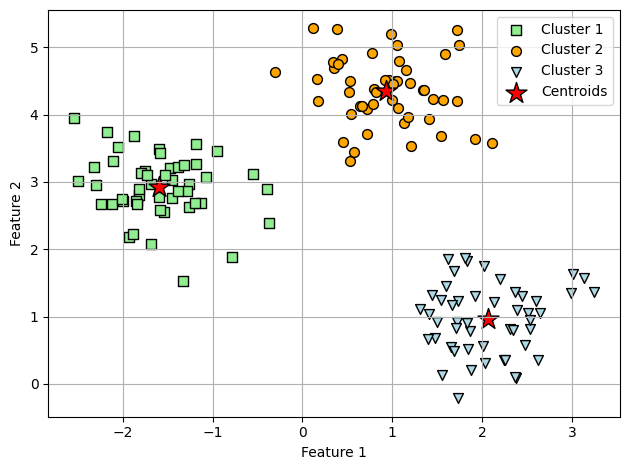

In [12]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### fuzzy k-means

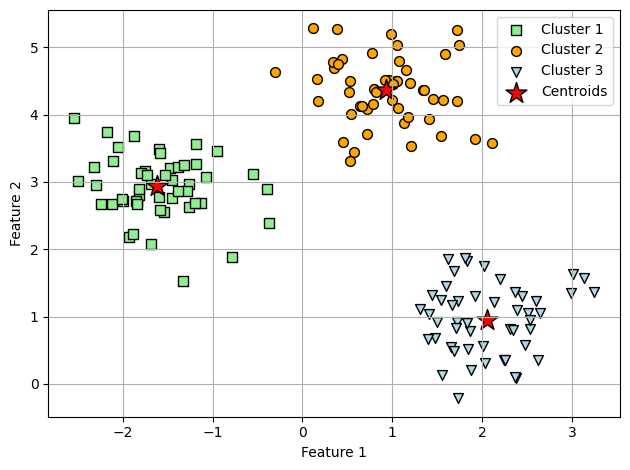

In [10]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt
n_samples = 5000
## Soft Clustering
fcm = FCM(n_clusters=3)
fcm.fit(X)
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(fcm_centers[:,0], fcm_centers[:,1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### elbow method to find the optimal number of clusters

In [13]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


In [15]:
distortions = [] ## K is inversely propotional to distortion
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

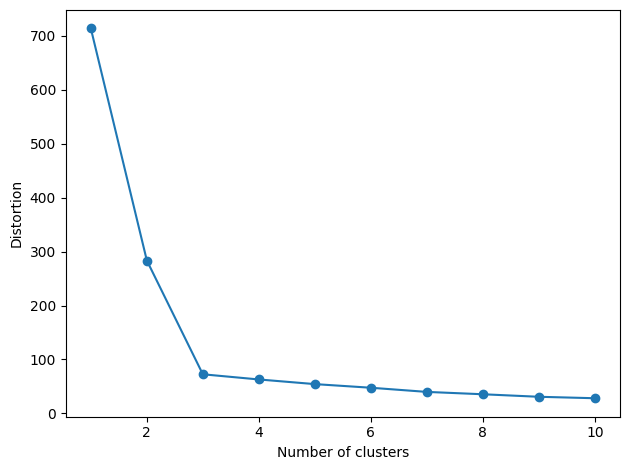

In [16]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### Quantifying the quality of clustering via silhouette plots

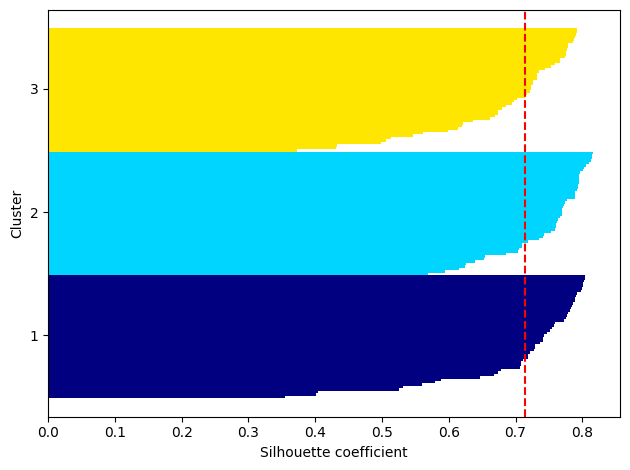

In [18]:
km = KMeans(n_clusters=3, 
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

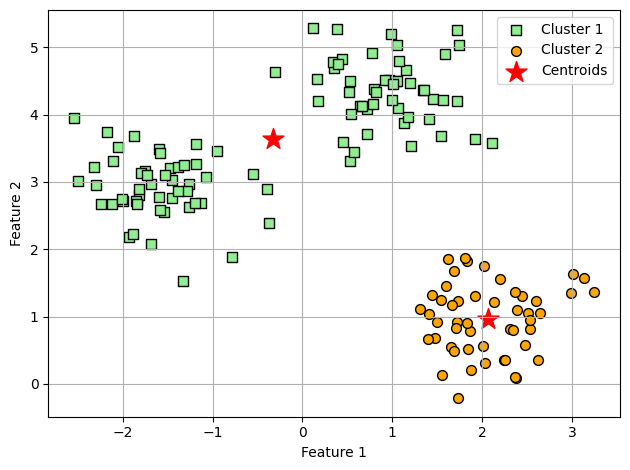

In [21]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', edgecolor='black', marker='s', label='Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolor='black', marker='o', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

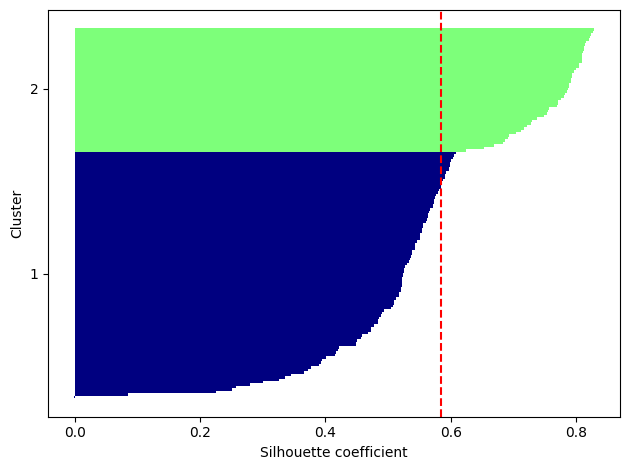

In [22]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

### hierarchical clustering

##### agglomerative clustering

1. Compute a pair-wise distance matrix of all examples.
2. Represent each data point as a singleton cluster.
3. Merge the two closest clusters based on the distance between the most dissimilar (distant)
members.
4. Update the cluster linkage matrix.
5. Repeat steps 2-4 until one single cluster remains.

In [23]:
import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [24]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [28]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(df.values,
                       method='complete',
                       metric='euclidean')

In [29]:
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'], 
             index=[f'cluster {(i + 1)}' for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


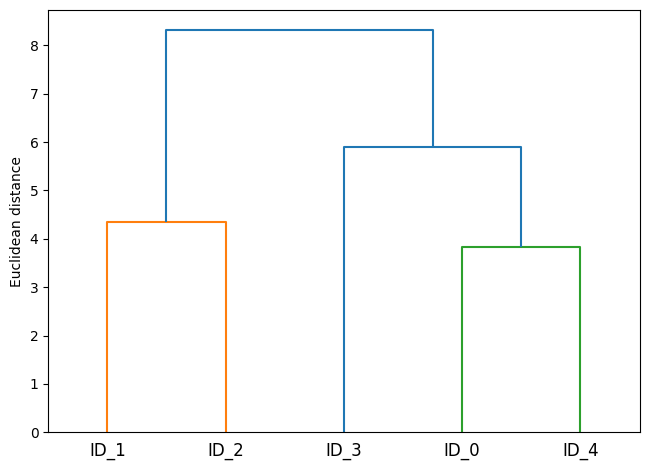

In [34]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

C:\Users\debab\AppData\Local\Temp\ipykernel_5132\3010755068.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
C:\Users\debab\AppData\Local\Temp\ipykernel_5132\3010755068.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


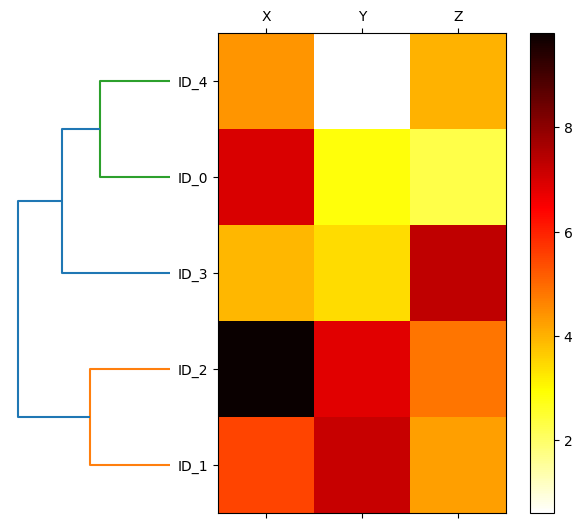

In [40]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                             metric='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


In [43]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,
                             metric='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [0 1 1 0 0]


### DBSCAN

• A point is considered a core point if at least a specified number (MinPts) of neighboring points
fall within the specified radius, 𝜀

• A border point is a point that has fewer neighbors than MinPts within 𝜀, but lies within the 𝜀
radius of a core point

• All other points that are neither core nor border points are considered noise points

1. Form a separate cluster for each core point or connected group of core points. (Core points
are connected if they are no farther away than 𝜀.)
2. Assign each border point to the cluster of its corresponding core point.t.

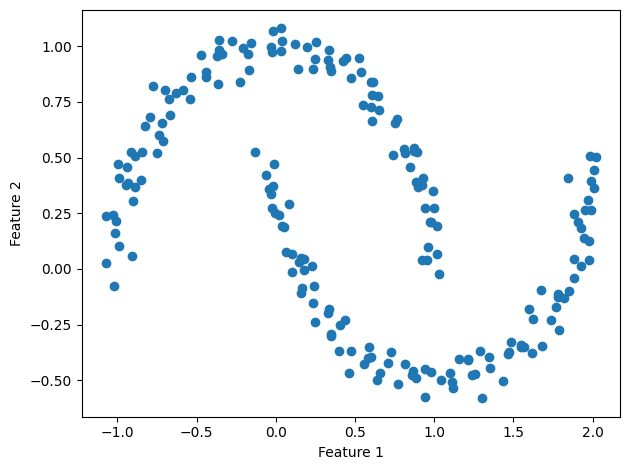

In [45]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

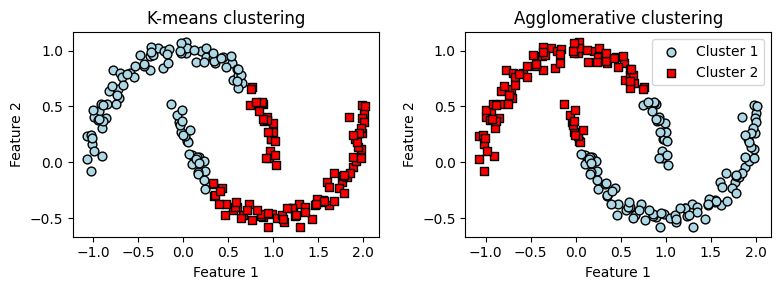

In [50]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ac = AgglomerativeClustering(n_clusters=2, 
                             metric='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)

ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

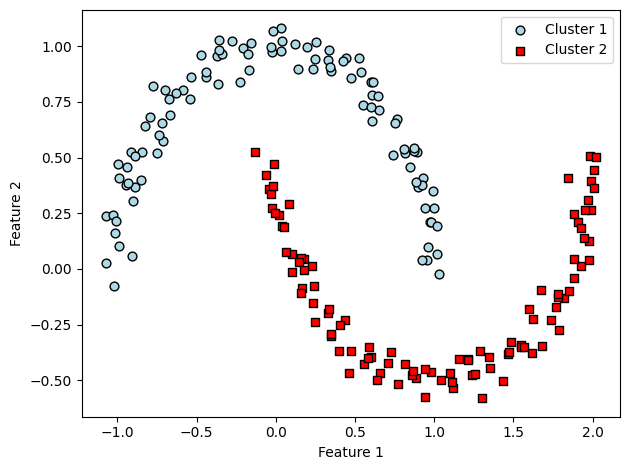

In [51]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, 
            min_samples=5, 
            metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c='lightblue', edgecolor='black', marker='o', s=40, label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c='red', edgecolor='black', marker='s', s=40, label='Cluster 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

### Spectral Clustering

1. Form a distance matrix

2. Transform the distance matrix into an affinity matrix A

3. Compute the degree matrix D and the Laplacian matrix L = D – A.

4. Find the eigenvalues and eigenvectors of L.

5. With the eigenvectors of k largest eigenvalues computed from the previous step form a matrix.

6. Normalize the vectors.

7. Cluster the data points in k-dimensional space.

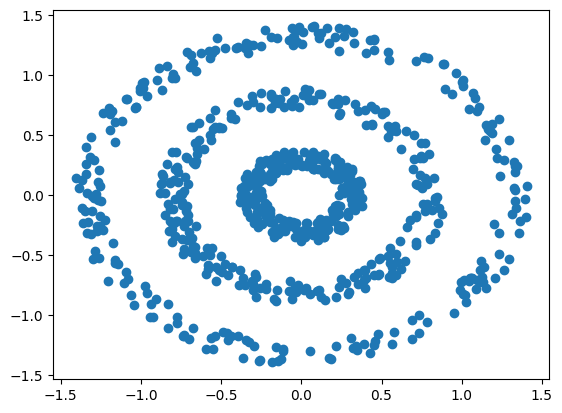

In [170]:
from spectralcluster import SpectralClusterer
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from numpy import random

np.random.seed(1748)

min_vals = [0.05, 0.5, 1.5]
max_vals = [0.15, 0.8, 2.0]
x = []
y = []
X = []
for i in range(3):
    r = np.sqrt(np.random.uniform(min_vals[i], max_vals[i], 250))
    p = np.random.uniform(0, 1, 250)
    theta = p * 2 * np.pi
    x_temp = r * np.cos(theta)
    y_temp = r * np.sin(theta)
    x.extend(x_temp)
    y.extend(y_temp)

data = pd.DataFrame({'x':x, 'y': y})
plt.scatter(x, y)
plt.show()

In [171]:
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(1748)
kmeans = KMeans(n_clusters=3).fit(data)
kmeans_labels = kmeans.labels_
data['kmeans_labels'] = kmeans_labels

In [205]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans

def Spectral_Clustering(X, n_clusters = 3, metric='euclidean', sim_graph='fully_connect', sigma=1, knn=10, epsi=0.5, normalized=1):
    Adj_mat = squareform(pdist(X, metric=metric))

    if sim_graph ==  'fully_connect':
        W = np.exp(-Adj_mat/(2*sigma))
    elif sim_graph == 'eps_neighbor':
        W = (Adj_mat <= epsi).astype('float64')
    elif sim_graph == 'knn':
        W = np.zeros(Adj_mat.shape)
        Adj_sort = np.argsort(Adj_mat, axis=1)
        for i in range(Adj_sort.shape[0]):
            W[i,Adj_sort[i,:][:(knn+1)]] = 1
    elif sim_graph == 'mutual_knn':
        W1 = np.zeros(Adj_mat.shape)
        Adj_sort = np.argsort(Adj_mat, axis=1)
        for i in range(Adj_mat.shape[0]):
            for j in Adj_sort[i,:][:(knn+1)]:
                if i == j:
                    W1[i,i] = 1
                elif W1[i,j] == 0 and W1[j,i] == 0:
                    W1[i,j] = 0.5
                else:
                    W1[i,j] = W1[j,i] = 1
        W = np.copy((W1 > 0.5).astype('float64'))
    else:
        raise ValueError("The 'sim_graph' argument should be one of the strings, 'fully_connect', 'eps_neighbor', 'knn', or 'mutual_knn'!")
        
    D = np.diag(np.sum(W, axis=1))
    L = D - W
    
    if normalized == 1:   ## Random Walk normalized version
        D_inv = np.diag(1/np.diag(D))
        Lambdas, V = np.linalg.eig(np.dot(D_inv, L))
        ind = np.argsort(np.linalg.norm(np.reshape(Lambdas, (1, len(Lambdas))), axis=0))
        V_K = np.real(V[:, ind[:n_clusters]])
    elif normalized == 2:   ## Graph cut normalized version
        D_inv_sqrt = np.diag(1/np.sqrt(np.diag(D)))
        Lambdas, V = np.linalg.eig(np.matmul(np.matmul(D_inv_sqrt, L), D_inv_sqrt))
        ind = np.argsort(np.linalg.norm(np.reshape(Lambdas, (1, len(Lambdas))), axis=0))
        V_K = np.real(V[:, ind[:n_clusters]])
        if any(V_K.sum(axis=1) == 0):
            raise ValueError("Can't normalize the matrix with the first K eigenvectors as columns! Perhaps the number of\
                              clusters K or the number of neighbors in k-NN is too small.")
        V_K = V_K/np.reshape(np.linalg.norm(V_K, axis=1), (V_K.shape[0], 1))
    else:   ## Unnormalized version
        Lambdas, V = np.linalg.eig(L)
        ind = np.argsort(np.linalg.norm(np.reshape(Lambdas, (1, len(Lambdas))), axis=0))
        V_K = np.real(V[:, ind[:n_clusters]])
        
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0).fit(V_K)
    return kmeans

In [203]:
sc = Spectral_Clustering(data[['x','y']], sim_graph='knn')
data['spectrailcluster_labels'] = sc.labels_
print(data.head())

          x         y  kmeans_labels  spectrailcluster_labels
0 -0.243333 -0.127028              0                        2
1  0.156756  0.267425              1                        2
2  0.213149 -0.175091              2                        2
3 -0.030775 -0.228678              2                        2
4  0.029780 -0.319986              2                        2


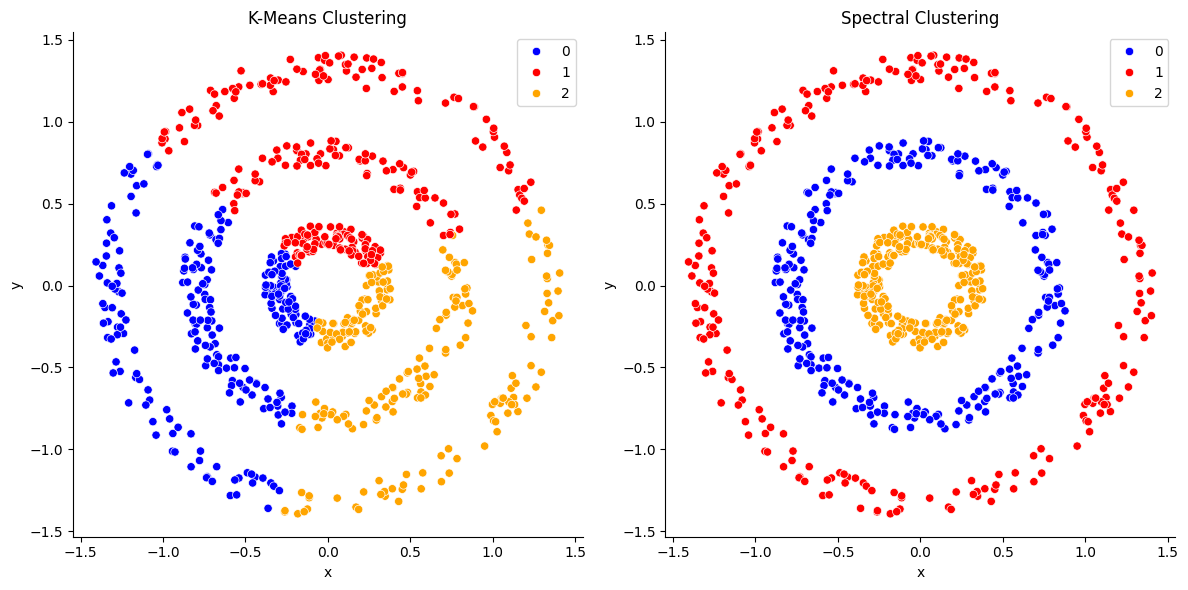

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# K-Means Clustering Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='x', y='y', hue='kmeans_labels', palette=['blue', 'red', 'orange'])
plt.title('K-Means Clustering')
plt.grid(False)
plt.legend(loc='upper right')
sns.despine()

# Spectral Clustering Plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='x', y='y', hue='spectrailcluster_labels', palette=['blue', 'red', 'orange'])
plt.title('Spectral Clustering')
plt.grid(False)
plt.legend(loc='upper right')
sns.despine()

plt.tight_layout()
plt.show()